# by Abhishek Thakur

# Supervised vs unsupervised learning

• **Supervised data:** always has one or multiple targets associated with it.
<br>
• **Unsupervised data:** does not have any target variable.

If the target is categorical, the problem becomes a classification problem. And if the target is a real number, the problem is defined as a regression problem.
<br>
<br>
• **Classification:** predicting a category, e.g. dog or cat.
<br>
• **Regression:** predicting a value, e.g. house prices.

Clustering is one of the approaches of Unsupervised problems.
<br>
To make sense of unsupervised problems, we can also use
numerous decomposition techniques such as **Principal Component Analysis
(PCA)**, **t-distributed Stochastic Neighbour Embedding (t-SNE) etc.**

https://www.kaggle.com/arthurtok/interactive-intro-to-dimensionality-reduction

In [1]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # to handle the numerical arrays
import pandas as pd # to create dataframes from the numerical arrays
import seaborn as sns # for plotting

from sklearn import datasets # to get the data
from sklearn import manifold # to perform t-SNE

%matplotlib inline

In [2]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)

pixel_values, targets = data

In [3]:
pixel_values

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


784 means 28*28 pixels(each records is one image)

In [4]:
pixel_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [5]:
targets

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [6]:
targets = targets.astype(int)

In [7]:
targets

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

We can visualize the samples in this dataset by reshaping them to their original
shape and then plotting them using matplotlib.

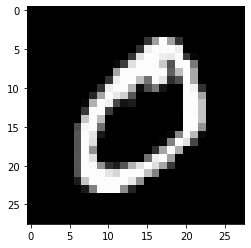

In [8]:
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)

plt.imshow(single_image, cmap='gray')

In [9]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

In [10]:
transformed_data

array([[ -5.281551 , -28.952768 ],
       [-26.105896 , -68.06932  ],
       [-42.503582 ,  35.58039  ],
       ...,
       [ 13.466378 ,  47.369007 ],
       [ -2.4357524,   7.983772 ],
       [ -4.2482643, -13.26691  ]], dtype=float32)

In [11]:
len(transformed_data)

3000

the above step creates the t-SNE transformation of the data.
<br>
We use only two components as we can visualize them well in a two-dimensional setting.
<br>
The transformed_data, in this case, is an array of shape 3000x2 (3000 rows and 2 columns). A data like this can be converted to a pandas dataframe by calling pd.DataFrame on the array.

In [12]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=['x','y','targets']
)

In [13]:
tsne_df #x and y are the two components from t-SNE decomposition and targets is the actual number

,x,y,targets
0,-5.281551,-28.952768,5.0
1,-26.105896,-68.069321,0.0
2,-42.503582,35.580391,4.0
3,38.893967,26.663395,1.0
4,-14.770573,35.433247,9.0
...,...,...,...
2995,9.038110,58.850792,7.0
2996,-29.405334,-60.951775,0.0
2997,13.466378,47.369007,9.0
2998,-2.435752,7.983772,1.0


/home/hduser/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


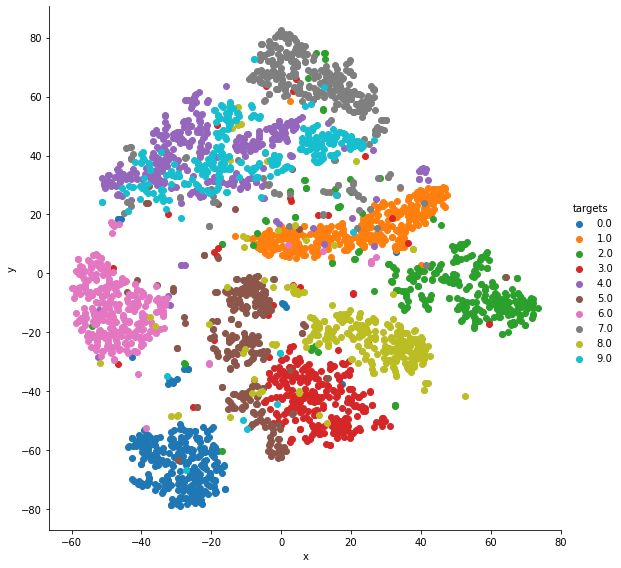

In [14]:
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter, 'x', 'y').add_legend()

This above is one way of visualizing unsupervised datasets.
<br>
We can also do **k-means clustering** on the same dataset and see how it performs in an unsupervised setting. You have to find the number clusters by **cross-validation.**
<br>
MNIST is a supervised classification problem, and we converted it to an unsupervised problem only to check if it gives any kind of good results.
<br>
we do get good results with decomposition with t-SNE, the results would be even better if we use classification algorithms